In [1]:
import scipy
import numpy
import sklearn
import pandas as pds
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn import tree
from sklearn import metrics

In [2]:
dt = pds.read_csv('data.txt', sep="\t") # load a pandas dataframe from csv in current directory
dt = dt[:-5]
dt

,Time,Time Code,Country Name,Country Code,Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],"Industry (including construction), value added per worker (constant 2010 US$) [NV.IND.EMPL.KD]","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$) [NV.AGR.EMPL.KD]",Poverty gap at national poverty lines (%) [SI.POV.NAGP],"International tourism, receipts (% of total exports) [ST.INT.RCPT.XP.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],"Cause of death, by non-communicable diseases (% of total) [SH.DTH.NCOM.ZS]",Urban population (% of total population) [SP.URB.TOTL.IN.ZS],"Population, total [SP.POP.TOTL]"
0,2014,YR2014,Afghanistan,AFG,NaN,0.154910,89.500000,NaN,-0.665271,2098.467820,1016.325617,NaN,6.091047,15.782377,51.413547,NaN,24.587,33370794.0
1,2014,YR2014,Albania,ALB,NaN,0.175746,100.000000,0.000000,1.980930,15410.716379,5431.984311,NaN,49.514703,28.213001,47.194844,NaN,56.423,2889104.0
2,2014,YR2014,Algeria,DZA,NaN,0.260914,99.877052,99.604620,1.699790,27123.281149,19022.535897,NaN,0.496957,30.219117,31.926659,NaN,70.221,38923687.0
3,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,NaN,66.251944,105.443235,NaN,87.288,55791.0
4,2014,YR2014,Andorra,AND,NaN,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.441,79213.0
5,2014,YR2014,Angola,AGO,NaN,0.179228,32.000000,46.824895,1.219833,57795.491981,1446.776745,NaN,2.624433,44.695031,34.637896,NaN,62.731,26941779.0
6,2014,YR2014,Antigua and Barbuda,ATG,NaN,0.261101,100.000000,NaN,3.475435,NaN,NaN,NaN,78.264635,46.311657,58.216221,NaN,25.175,92562.0
7,2014,YR2014,Argentina,ARG,NaN,0.238976,100.000000,64.257069,-3.578581,25174.695235,304184.964709,NaN,6.897874,14.405479,14.001315,NaN,91.377,42669500.0
8,2014,YR2014,Armenia,ARM,NaN,0.225902,100.000000,42.438710,3.072859,NaN,NaN,4.5,29.954687,28.565139,47.046546,NaN,63.112,2912403.0
9,2014,YR2014,Aruba,ABW,NaN,0.220024,100.000000,NaN,0.250567,NaN,NaN,NaN,70.663577,69.850306,79.759646,NaN,43.041,103774.0


In [3]:
dt = pds.read_csv('569a01d3-3538-49da-a03a-63d8d3151235_Data.txt', sep="\t") # load a pandas dataframe from csv in current directory
dt = dt[:-5]
dt

,Time,Time Code,Country Name,Country Code,CO2 emissions (kg per 2011 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Electricity production from oil, gas and coal sources (% of total) [EG.ELC.FOSL.ZS]",GDP per capita growth (annual %) [NY.GDP.PCAP.KD.ZG],"Industry (including construction), value added per worker (constant 2010 US$) [NV.IND.EMPL.KD]","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$) [NV.AGR.EMPL.KD]","International tourism, receipts (% of total exports) [ST.INT.RCPT.XP.ZS]",Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS],Imports of goods and services (% of GDP) [NE.IMP.GNFS.ZS],Urban population (% of total population) [SP.URB.TOTL.IN.ZS],"Population, total [SP.POP.TOTL]","Death rate, crude (per 1,000 people) [SP.DYN.CDRT.IN]",Forest area (% of land area) [AG.LND.FRST.ZS]
0,2014,YR2014,Afghanistan,AFG,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
1,2014,YR2014,Albania,ALB,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
2,2014,YR2014,Algeria,DZA,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
3,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
4,2014,YR2014,Andorra,AND,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
5,2014,YR2014,Angola,AGO,0.189387,32.000000,46.824895,1.219833,57795.491981,1446.776745,2.624433,44.695031,34.637896,62.731,26941779.0,9.454,46.507420
6,2014,YR2014,Antigua and Barbuda,ATG,0.275901,100.000000,NaN,3.475435,NaN,NaN,78.264635,46.311657,58.216221,25.175,92562.0,6.188,22.272728
7,2014,YR2014,Argentina,ARG,0.252522,100.000000,64.257069,-3.578581,25174.695235,304184.964709,6.897874,14.405479,14.001315,91.377,42669500.0,7.651,10.015311
8,2014,YR2014,Armenia,ARM,0.238707,100.000000,42.438710,3.072859,NaN,NaN,29.954687,28.565139,47.046546,63.112,2912403.0,9.796,11.654373
9,2014,YR2014,Aruba,ABW,0.232496,100.000000,NaN,0.250567,NaN,NaN,70.663577,69.850306,79.759646,43.041,103774.0,8.488,2.333333


In [4]:
 stamps = ['Time\t', 'Time Code\t', 'Country Name\t', 'Country Code\t', 'CO2 emissions (kg per 2011 PPP $ of GDP)\t', 'Access to electricity (% of population)\t', 'Electricity production from oil, gas and coal sources (% of total)\t', 'GDP per capita growth (annual %)\t', 'Industry (including construction), value added per worker (constant 2010 US$)\t', 'Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t', 'International tourism, receipts (% of total exports)\t', 'Exports of goods and services (% of GDP)\t', 'Imports of goods and services (% of GDP)\t', 'Urban population (% of total population)\t', 'Population, total\t', 'Death rate, crude (per 1,000 people)\t', 'Forest area (% of land area)']

In [5]:
dt.columns = stamps
dt

,Time,Time Code,Country Name,Country Code,CO2 emissions (kg per 2011 PPP $ of GDP),Access to electricity (% of population),"Electricity production from oil, gas and coal sources (% of total)",GDP per capita growth (annual %),"Industry (including construction), value added per worker (constant 2010 US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","International tourism, receipts (% of total exports)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Urban population (% of total population),"Population, total","Death rate, crude (per 1,000 people)",Forest area (% of land area)
0,2014,YR2014,Afghanistan,AFG,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
1,2014,YR2014,Albania,ALB,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
2,2014,YR2014,Algeria,DZA,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
3,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
4,2014,YR2014,Andorra,AND,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
5,2014,YR2014,Angola,AGO,0.189387,32.000000,46.824895,1.219833,57795.491981,1446.776745,2.624433,44.695031,34.637896,62.731,26941779.0,9.454,46.507420
6,2014,YR2014,Antigua and Barbuda,ATG,0.275901,100.000000,NaN,3.475435,NaN,NaN,78.264635,46.311657,58.216221,25.175,92562.0,6.188,22.272728
7,2014,YR2014,Argentina,ARG,0.252522,100.000000,64.257069,-3.578581,25174.695235,304184.964709,6.897874,14.405479,14.001315,91.377,42669500.0,7.651,10.015311
8,2014,YR2014,Armenia,ARM,0.238707,100.000000,42.438710,3.072859,NaN,NaN,29.954687,28.565139,47.046546,63.112,2912403.0,9.796,11.654373
9,2014,YR2014,Aruba,ABW,0.232496,100.000000,NaN,0.250567,NaN,NaN,70.663577,69.850306,79.759646,43.041,103774.0,8.488,2.333333


In [6]:
dt.index = dt['Country Name\t']
dt

,Time,Time Code,Country Name,Country Code,CO2 emissions (kg per 2011 PPP $ of GDP),Access to electricity (% of population),"Electricity production from oil, gas and coal sources (% of total)",GDP per capita growth (annual %),"Industry (including construction), value added per worker (constant 2010 US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","International tourism, receipts (% of total exports)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Urban population (% of total population),"Population, total","Death rate, crude (per 1,000 people)",Forest area (% of land area)
Country Name,,,,,,,,,,,,,,,,,
Afghanistan,2014,YR2014,Afghanistan,AFG,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
Albania,2014,YR2014,Albania,ALB,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
Algeria,2014,YR2014,Algeria,DZA,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
American Samoa,2014,YR2014,American Samoa,ASM,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
Andorra,2014,YR2014,Andorra,AND,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
Angola,2014,YR2014,Angola,AGO,0.189387,32.000000,46.824895,1.219833,57795.491981,1446.776745,2.624433,44.695031,34.637896,62.731,26941779.0,9.454,46.507420
Antigua and Barbuda,2014,YR2014,Antigua and Barbuda,ATG,0.275901,100.000000,NaN,3.475435,NaN,NaN,78.264635,46.311657,58.216221,25.175,92562.0,6.188,22.272728
Argentina,2014,YR2014,Argentina,ARG,0.252522,100.000000,64.257069,-3.578581,25174.695235,304184.964709,6.897874,14.405479,14.001315,91.377,42669500.0,7.651,10.015311
Armenia,2014,YR2014,Armenia,ARM,0.238707,100.000000,42.438710,3.072859,NaN,NaN,29.954687,28.565139,47.046546,63.112,2912403.0,9.796,11.654373


In [7]:
dt = dt.drop(['Time\t', 'Time Code\t', 'Country Name\t', 'Country Code\t'], axis=1)
dt

,CO2 emissions (kg per 2011 PPP $ of GDP),Access to electricity (% of population),"Electricity production from oil, gas and coal sources (% of total)",GDP per capita growth (annual %),"Industry (including construction), value added per worker (constant 2010 US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","International tourism, receipts (% of total exports)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Urban population (% of total population),"Population, total","Death rate, crude (per 1,000 people)",Forest area (% of land area)
Country Name,,,,,,,,,,,,,
Afghanistan,0.163691,89.500000,NaN,-0.665271,2098.467820,1016.325617,6.091047,15.782377,51.413547,24.587,33370794.0,7.141,2.067825
Albania,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2889104.0,7.219,28.191972
Algeria,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,38923687.0,4.709,0.818057
American Samoa,NaN,NaN,NaN,0.803753,NaN,NaN,NaN,66.251944,105.443235,87.288,55791.0,4.200,87.900000
Andorra,NaN,100.000000,NaN,4.293204,NaN,NaN,NaN,NaN,NaN,88.441,79213.0,NaN,34.042553
Angola,0.189387,32.000000,46.824895,1.219833,57795.491981,1446.776745,2.624433,44.695031,34.637896,62.731,26941779.0,9.454,46.507420
Antigua and Barbuda,0.275901,100.000000,NaN,3.475435,NaN,NaN,78.264635,46.311657,58.216221,25.175,92562.0,6.188,22.272728
Argentina,0.252522,100.000000,64.257069,-3.578581,25174.695235,304184.964709,6.897874,14.405479,14.001315,91.377,42669500.0,7.651,10.015311
Armenia,0.238707,100.000000,42.438710,3.072859,NaN,NaN,29.954687,28.565139,47.046546,63.112,2912403.0,9.796,11.654373


In [15]:
dt = dt.dropna()

In [16]:
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

In [48]:
dt

,CO2 emissions (kg per 2011 PPP $ of GDP),Access to electricity (% of population),"Electricity production from oil, gas and coal sources (% of total)",GDP per capita growth (annual %),"Industry (including construction), value added per worker (constant 2010 US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","International tourism, receipts (% of total exports)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Urban population (% of total population),"Population, total","Death rate, crude (per 1,000 people)",Forest area (% of land area)
Country Name,,,,,,,,,,,,,
Albania,0.184922,100.000000,0.000000,1.980930,15410.716379,5431.984311,49.514703,28.213001,47.194844,56.423,2.889104e+06,7.219,28.191972
Algeria,0.275704,99.877052,99.604620,1.699790,27123.281149,19022.535897,0.496957,30.219117,31.926659,70.221,3.892369e+07,4.709,0.818057
Angola,0.189387,32.000000,46.824895,1.219833,57795.491981,1446.776745,2.624433,44.695031,34.637896,62.731,2.694178e+07,9.454,46.507420
Argentina,0.252522,100.000000,64.257069,-3.578581,25174.695235,304184.964709,6.897874,14.405479,14.001315,91.377,4.266950e+07,7.651,10.015311
Australia,0.352370,100.000000,85.093288,1.050180,134038.446027,81470.411093,11.312784,21.039455,21.467035,85.602,2.347569e+07,6.600,16.198664
Austria,0.155262,100.000000,17.721046,-0.122369,99415.945631,26056.410587,8.857949,53.386579,50.116956,57.526,8.546356e+06,9.200,46.862087
Azerbaijan,0.233278,100.000000,94.018926,1.522139,47844.821994,2018.483911,8.333124,43.273557,26.209669,54.422,9.535079e+06,5.800,13.466485
Bahrain,0.534926,100.000000,100.000000,2.706112,50062.321981,10912.131122,5.965235,96.050751,79.513899,88.915,1.336075e+06,2.337,0.765240
Bangladesh,0.154435,62.400000,98.680276,4.856108,3571.749175,869.204249,0.465859,18.989660,25.524420,33.535,1.545202e+08,5.565,10.997926


## Corrélation

In [50]:
dt.corr()

,CO2 emissions (kg per 2011 PPP $ of GDP),Access to electricity (% of population),"Electricity production from oil, gas and coal sources (% of total)",GDP per capita growth (annual %),"Industry (including construction), value added per worker (constant 2010 US$)","Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)","International tourism, receipts (% of total exports)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),Urban population (% of total population),"Population, total","Death rate, crude (per 1,000 people)",Forest area (% of land area)
CO2 emissions (kg per 2011 PPP $ of GDP)\t,1.000000,0.274127,0.359183,-0.212124,-0.062150,-0.034418,-0.119785,0.056523,0.062583,0.135239,0.188129,0.048870,-0.191606
Access to electricity (% of population)\t,0.274127,1.000000,0.128100,-0.329176,0.338958,0.284109,0.014577,0.227089,0.094740,0.591564,0.006627,-0.093364,-0.044663
"Electricity production from oil, gas and coal sources (% of total)\t",0.359183,0.128100,1.000000,-0.127472,-0.015526,-0.087164,-0.073331,0.126655,0.015889,0.136812,0.122155,-0.215226,-0.302908
GDP per capita growth (annual %)\t,-0.212124,-0.329176,-0.127472,1.000000,-0.337297,-0.356535,0.021202,0.013233,0.131582,-0.520827,0.231039,0.127288,0.075547
"Industry (including construction), value added per worker (constant 2010 US$)\t",-0.062150,0.338958,-0.015526,-0.337297,1.000000,0.508513,-0.288006,0.425712,0.156820,0.581236,-0.101712,-0.148391,0.040373
"Agriculture, forestry, and fishing, value added per worker (constant 2010 US$)\t",-0.034418,0.284109,-0.087164,-0.356535,0.508513,1.000000,-0.128625,0.014033,-0.133903,0.480087,-0.061797,-0.008702,-0.027021
"International tourism, receipts (% of total exports)\t",-0.119785,0.014577,-0.073331,0.021202,-0.288006,-0.128625,1.000000,-0.205395,0.030890,-0.195178,-0.146200,-0.061157,-0.077567
Exports of goods and services (% of GDP)\t,0.056523,0.227089,0.126655,0.013233,0.425712,0.014033,-0.205395,1.000000,0.877228,0.307424,-0.183773,-0.003058,0.051499
Imports of goods and services (% of GDP)\t,0.062583,0.094740,0.015889,0.131582,0.156820,-0.133903,0.030890,0.877228,1.000000,0.082909,-0.234622,0.058794,0.005540
Urban population (% of total population)\t,0.135239,0.591564,0.136812,-0.520827,0.581236,0.480087,-0.195178,0.307424,0.082909,1.000000,-0.143020,-0.115397,0.030171


In [ ]:
dt = dt.drop([''], axis=1)
dt

## SSE

In [42]:
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(dt)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)

[3.3025961106026374e+17, 9.888644263452278e+16, 4.692707108679242e+16, 2.6257881882958296e+16, 1.6608272150533346e+16, 1.1882928745702764e+16, 9123143178005868.0, 6765645954359622.0, 4762067915627286.0]


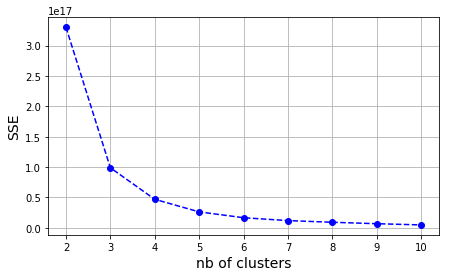

In [43]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

## K-Means

In [44]:
km = KMeans(n_clusters = 3) # create a KMeans object
km.fit(dt) # compute the clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

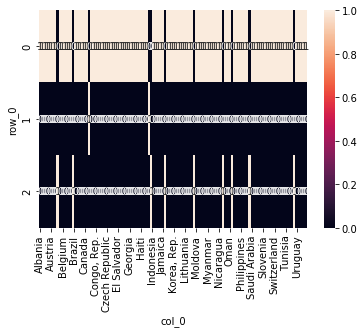

In [45]:
km.cluster_centers_
clusters = km.labels_ # get cluster labels for all objects
crosstab = pds.crosstab(clusters, dt.index)
sns.heatmap(crosstab, annot=True)

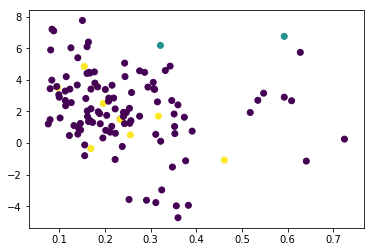

In [46]:
plt.scatter(dt['CO2 emissions (kg per 2011 PPP $ of GDP)\t'], dt['GDP per capita growth (annual %)\t'], c = clusters)

KeyError: 'clusters'

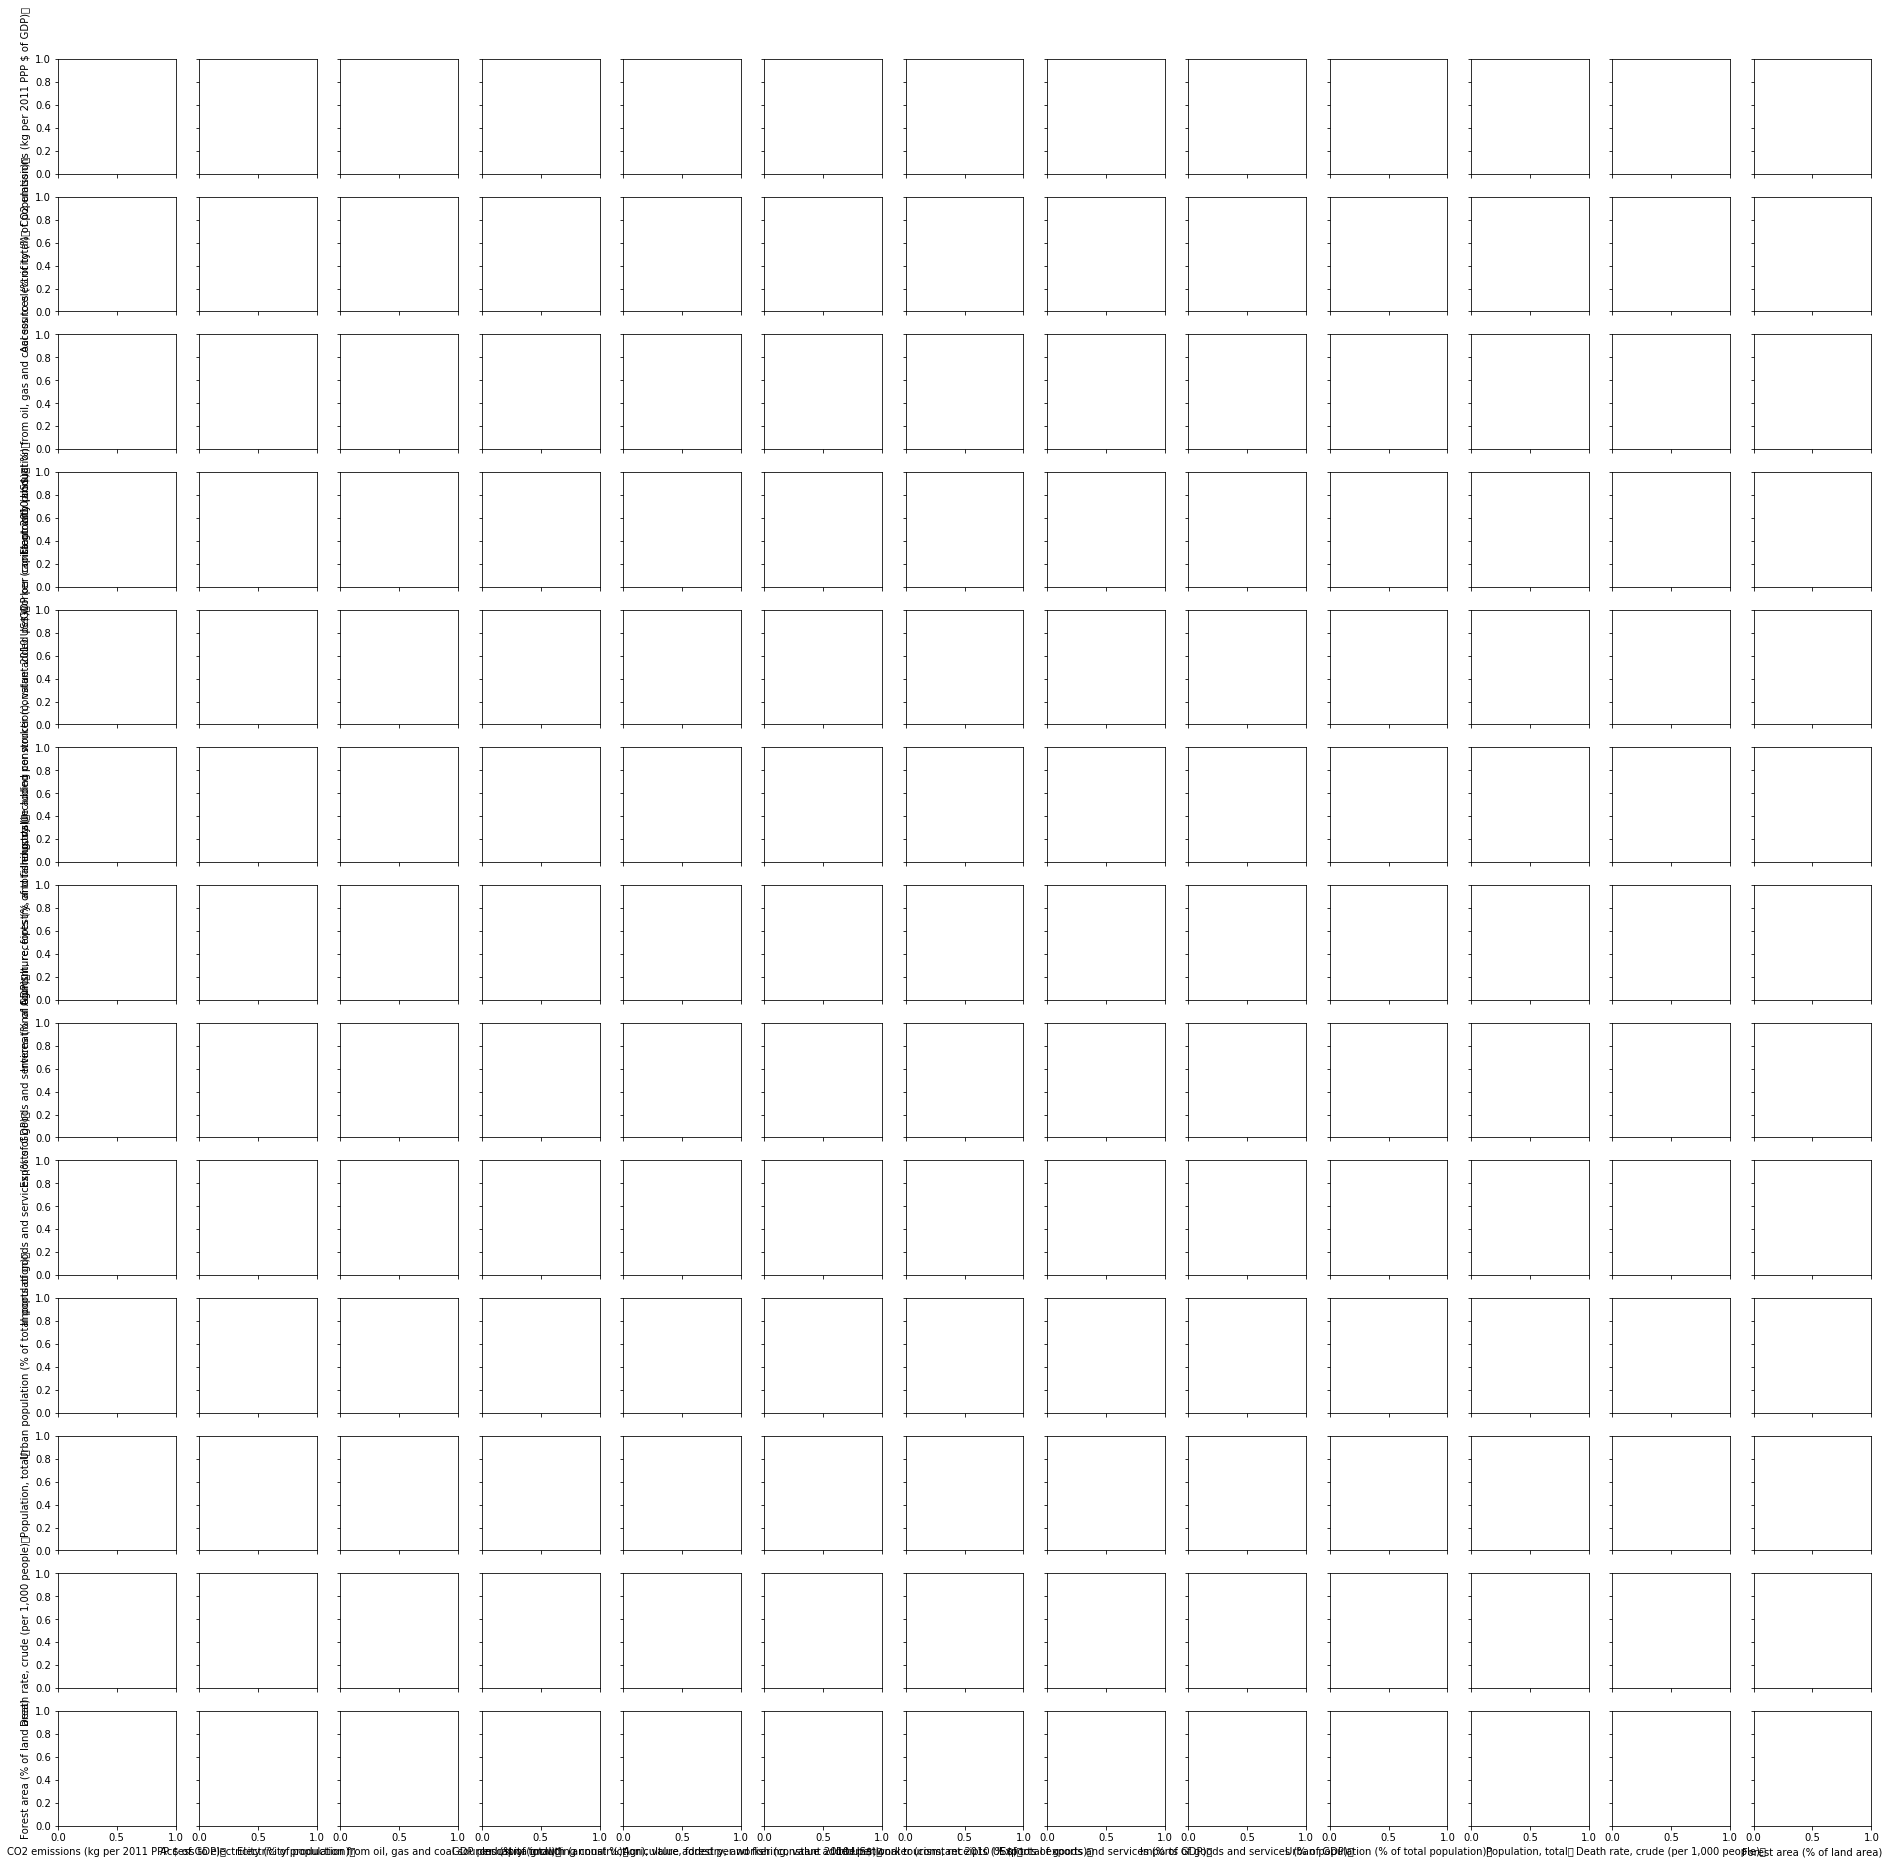

In [49]:
sns.pairplot(data=dt, hue="clusters")